In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf # Import tensorflow

# 1. Load the dataset
# The 'penguins' dataset only has a 'train' split. We will load it and then split it manually.
# Set as_supervised=True to get a (features, label) tuple, making feature access more direct.
ds_full, ds_info = tfds.load(
    'penguins',
    split='train', # Load only the 'train' split
    as_supervised=True, # Changed to True to get (features_dict, label) tuple
    with_info=True
)

# Get the number of examples in the full dataset
num_examples = ds_info.splits['train'].num_examples

# Define the split ratio (e.g., 80% train, 20% test)
train_split_size = int(0.8 * num_examples)

# Manually split the dataset
ds_train = ds_full.take(train_split_size)
ds_test = ds_full.skip(train_split_size)

# 2. Prepare for Keras
# The dataset now returns a (features_tensor, label) tuple, where features_tensor is a single tensor
# containing all numerical features. We need to select relevant numerical features by index.
# Based on alphabetical order: ['body_mass_g', 'culmen_depth_mm', 'culmen_length_mm', 'flipper_length_mm', 'island', 'sex']
# We want: culmen_length_mm (index 2), culmen_depth_mm (index 1), flipper_length_mm (index 3), body_mass_g (index 0)
def prepare_data(features_tensor, label):
    # Combine specific numerical features into a single tensor by their indices
    numeric_features = tf.stack([
        features_tensor[2], # 'culmen_length_mm'
        features_tensor[1], # 'culmen_depth_mm'
        features_tensor[3], # 'flipper_length_mm'
        features_tensor[0]  # 'body_mass_g'
    ], axis=-1)
    return numeric_features, label

ds_train_keras = ds_train.map(prepare_data).batch(32)
ds_test_keras = ds_test.map(prepare_data).batch(32)

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf # Import tensorflow

# 1. Load the dataset
# The 'penguins' dataset only has a 'train' split. We will load it and then split it manually.
# Set as_supervised=True to get a (features, label) tuple, making feature access more direct.
ds_full, ds_info = tfds.load(
    'penguins',
    split='train', # Load only the 'train' split
    as_supervised=True, # Changed to True to get (features_dict, label) tuple
    with_info=True
)

# Get the number of examples in the full dataset
num_examples = ds_info.splits['train'].num_examples

# Define the split ratio (e.g., 80% train, 20% test)
train_split_size = int(0.8 * num_examples)

# Manually split the dataset
ds_train = ds_full.take(train_split_size)
ds_test = ds_full.skip(train_split_size)

# 2. Prepare for Keras
# The dataset now returns a (features_tensor, label) tuple, where features_tensor is a single tensor
# containing all numerical features. We need to select relevant numerical features by index.
# Based on alphabetical order: ['body_mass_g', 'culmen_depth_mm', 'culmen_length_mm', 'flipper_length_mm', 'island', 'sex']
# We want: culmen_length_mm (index 2), culmen_depth_mm (index 1), flipper_length_mm (index 3), body_mass_g (index 0)
def prepare_data(features_tensor, label):
    # Combine specific numerical features into a single tensor by their indices
    numeric_features = tf.stack([
        features_tensor[2], # 'culmen_length_mm'
        features_tensor[1], # 'culmen_depth_mm'
        features_tensor[3], # 'flipper_length_mm'
        features_tensor[0]  # 'body_mass_g'
    ], axis=-1)
    return numeric_features, label

ds_train_keras = ds_train.map(prepare_data).batch(32)
ds_test_keras = ds_test.map(prepare_data).batch(32)

In [3]:
# Determine the number of output classes for one-hot encoding
num_classes = ds_info.features['species'].num_classes
print(f"Number of classes: {num_classes}")

# Convert ds_train_keras to X_train and y_train
X_train_list = []
y_train_list = []
for features, labels in ds_train_keras:
    X_train_list.append(features)
    y_train_list.append(labels)
X_train = tf.concat(X_train_list, axis=0)
y_train = tf.concat(y_train_list, axis=0)

# Convert ds_test_keras to X_test and y_test
X_test_list = []
y_test_list = []
for features, labels in ds_test_keras:
    X_test_list.append(features)
    y_test_list.append(labels)
X_test = tf.concat(X_test_list, axis=0)
y_test = tf.concat(y_test_list, axis=0)

# One-hot encode the target variables for categorical crossentropy
y_train_one_hot = tf.one_hot(y_train, depth=num_classes)
y_test_one_hot = tf.one_hot(y_test, depth=num_classes)

print(f"X_train shape: {X_train.shape}")
print(f"y_train (one-hot) shape: {y_train_one_hot.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test (one-hot) shape: {y_test_one_hot.shape}")

Number of classes: 3
X_train shape: (267, 4)
y_train (one-hot) shape: (267, 3)
X_test shape: (67, 4)
y_test (one-hot) shape: (67, 3)


In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple sequential model
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax') # 3 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train_one_hot, epochs=50, batch_size=5, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4035 - loss: 1.0914 - val_accuracy: 0.4259 - val_loss: 1.0582
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4940 - loss: 1.0297 - val_accuracy: 0.4259 - val_loss: 1.0219
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4764 - loss: 0.9933 - val_accuracy: 0.4259 - val_loss: 0.9744
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4476 - loss: 0.9654 - val_accuracy: 0.5000 - val_loss: 0.9286
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5754 - loss: 0.8927 - val_accuracy: 0.6111 - val_loss: 0.8751
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6750 - loss: 0.8383 - val_accuracy: 0.7778 - val_loss: 0.8118
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7939 - loss: 0.7853 - val_accuracy: 0.8333 - val_loss: 0.7443
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8187 - loss: 0.7178 - val_accuracy: 0.8519 - val_loss: 0.6756
Epo

In [5]:
# Summarize model results
print("Model training completed.")
print(f"Final Training Accuracy: {model.history.history['accuracy'][-1]:.4f}")
print(f"Final Training Loss: {model.history.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {model.history.history['val_accuracy'][-1]:.4f}")
print(f"Final Validation Loss: {model.history.history['val_loss'][-1]:.4f}")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Model training completed.
Final Training Accuracy: 0.9906
Final Training Loss: 0.0510
Final Validation Accuracy: 1.0000
Final Validation Loss: 0.0541
Test Loss: 0.0359
Test Accuracy: 1.0000


In [6]:
# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = tf.argmax(y_pred_probabilities, axis=1)

print("Predicted probabilities for the first 5 test samples:")
print(y_pred_probabilities[:5])

print("Predicted classes for the first 5 test samples:")
print(y_pred_classes[:5].numpy())

print("True classes for the first 5 test samples:")
print(tf.argmax(y_test_one_hot[:5], axis=1).numpy())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
Predicted probabilities for the first 5 test samples:
[[9.9923682e-01 6.0338230e-04 1.5984396e-04]
 [4.1801032e-02 7.4354061e-03 9.5076358e-01]
 [9.9105966e-01 5.5595660e-03 3.3807233e-03]
 [9.5571089e-01 9.3622692e-03 3.4926783e-02]
 [3.8310417e-03 1.7906353e-04 9.9598980e-01]]
Predicted classes for the first 5 test samples:
[0 2 0 0 2]
True classes for the first 5 test samples:
[0 2 0 0 2]


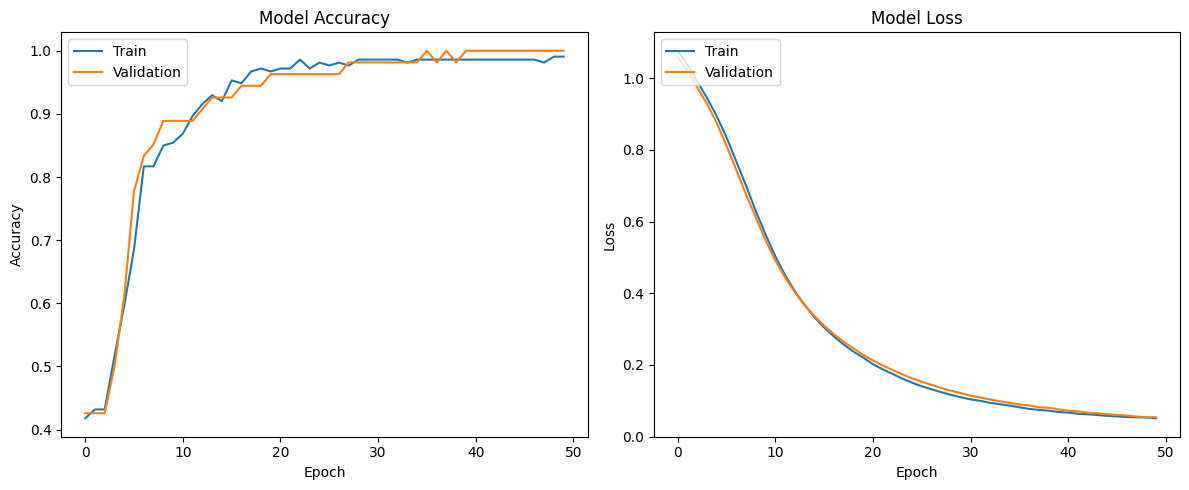

In [7]:
import matplotlib.pyplot as plt

# Get training history from the model
history = model.history.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

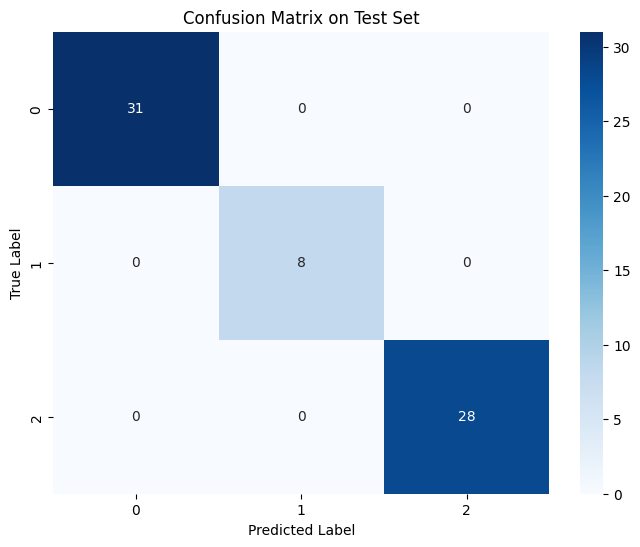

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true class labels from the one-hot encoded y_test
y_true_classes = tf.argmax(y_test_one_hot, axis=1).numpy()

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes.numpy())

# Get species names for labels from ds_info
species_names = ds_info.features['species'].names

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=species_names,
    yticklabels=species_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()